In [16]:
from pathlib import Path
file = Path("article_json_author") / "idnes.json"

In [17]:
from article_utils import create_df
df = create_df(file)
df.Name = "idnes"

100%|██████████| 491049/491049 [13:52<00:00, 589.73it/s]


In [18]:
# cut 1900 article
df_date = df.sort_values("date")
for i in df_date[0:20]["url"]:
    print(i)

df_date_asc = df.sort_values("date", ascending=False)
print("asc")
for i  in df_date_asc[0:4]["url"]:
    print(i)

df = df[df["date"] > df_date["date"].iloc[0]]
df.Name = "idnes"

https://www.idnes.cz/revue/zajimavosti/v-britanii-se-podarilo-vypestovat-dvojbarevne-jablko.A090928_105911_zajimavosti_nh
https://mobil.idnes.cz/uvod-ke-sluzbe-kratkych-textovych-zprav-sms-f3e-/mob_tech.aspx?c=970615_0002653_mob_ceny
https://www.idnes.cz/mobil/telefony/nokia-3110-recenze.A_970720_0003561_telefony
https://www.idnes.cz/mobil/tech-trendy/principy-fungovani-site-gsm.A_970825_0003060_mob_tech
https://www.idnes.cz/mobil/telefony/nokia-8110i-banan-zapekany-s-internetem-recenze.A_970915_0003487_telefony
https://www.idnes.cz/mobil/tech-trendy/telefonni-seznam-volne-na-internetu.A_971013_0047725_mob_ceny
https://www.idnes.cz/mobil/telefony/motorola-d170-recenze.A_971218_0004053_telefony
https://www.idnes.cz/mobil/telefony/alcatel-one-touch-easy-recenze.A_971218_0003000_telefony
https://www.idnes.cz/mobil/mobilni-operatori/nove-mobilni-telefony-v-nabidce-paegasu.A_980319_0003523_mob_operatori
https://www.idnes.cz/mobil/mobilni-operatori/expandia-banka-a-paegas-gsm-a-la-penezenka.

In [19]:
df.describe()

,article length,headline length,brief length,num words,num words ratio,num words per line,avg word length,non-alpha,non-alpha ratio
count,490703.000000,490703.000000,484660.000000,490703.000000,490703.000000,490703.000000,490703.000000,490703.000000,490703.000000
mean,2755.522369,62.696813,260.560215,475.657754,0.172008,42.253163,4.937519,77.918625,0.027908
std,2217.715225,12.773207,66.285497,388.794072,0.011547,42.853517,0.357933,76.074521,0.007865
min,5.000000,1.000000,1.000000,1.000000,0.075544,1.000000,1.941606,0.000000,0.000000
25%,1384.000000,60.000000,218.000000,236.000000,0.164292,31.263158,4.706294,36.000000,0.023414
50%,2238.000000,67.000000,261.000000,385.000000,0.170851,37.413793,4.949367,62.000000,0.026908
75%,3447.000000,70.000000,299.000000,593.000000,0.178588,45.428571,5.174312,97.000000,0.031033
max,129897.000000,225.000000,1465.000000,20551.000000,0.424149,4920.000000,12.440678,7017.000000,0.228747


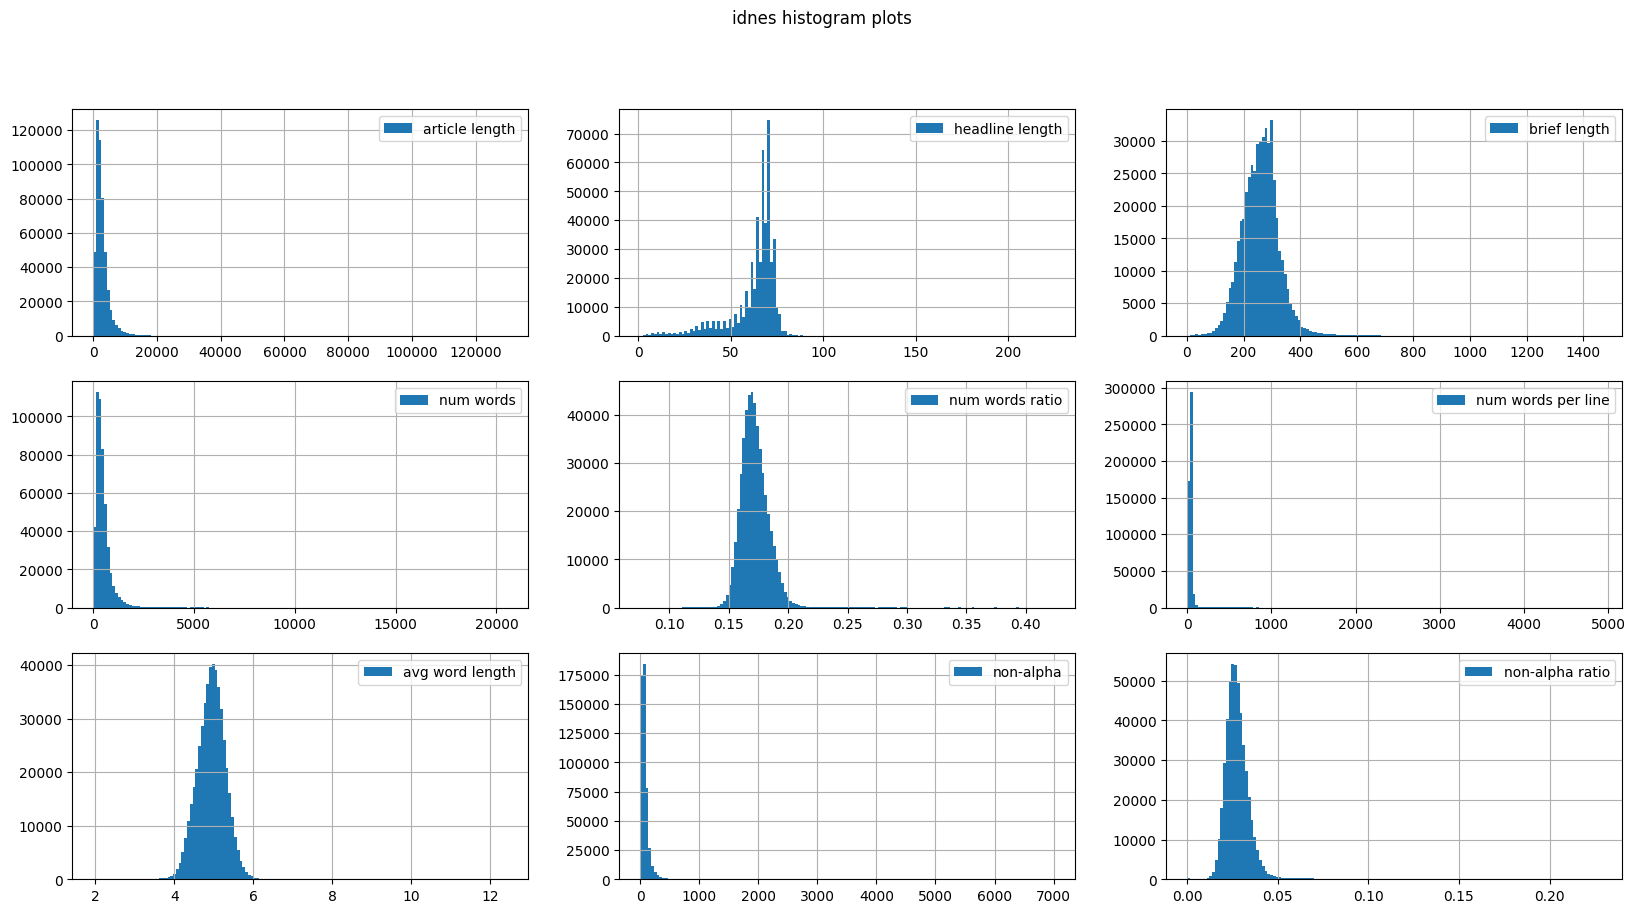

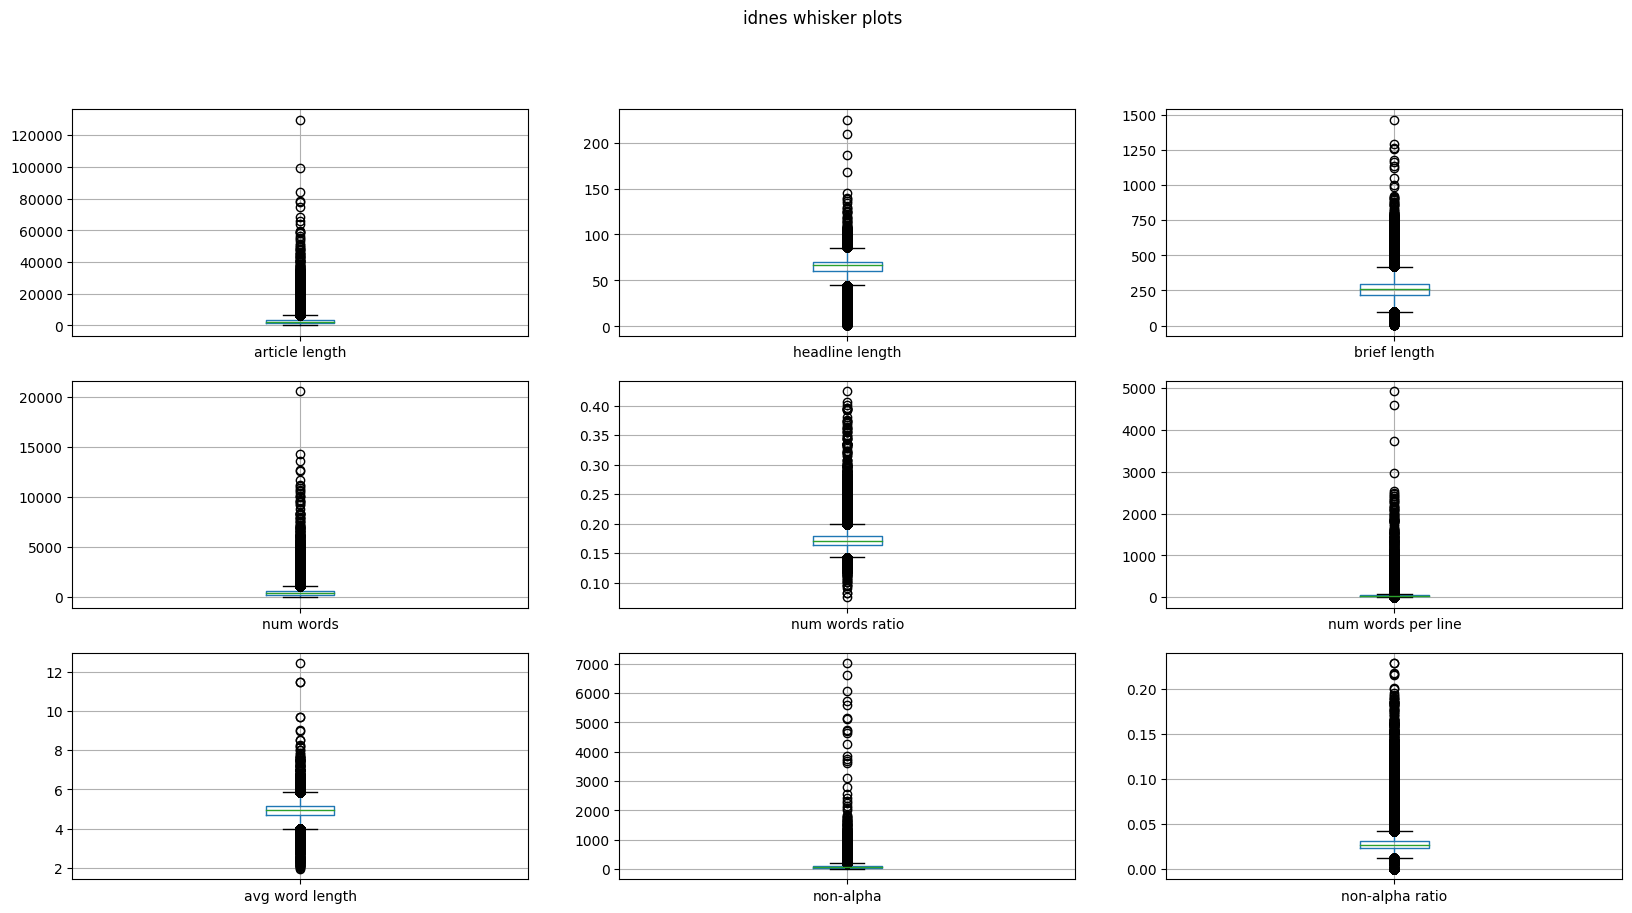

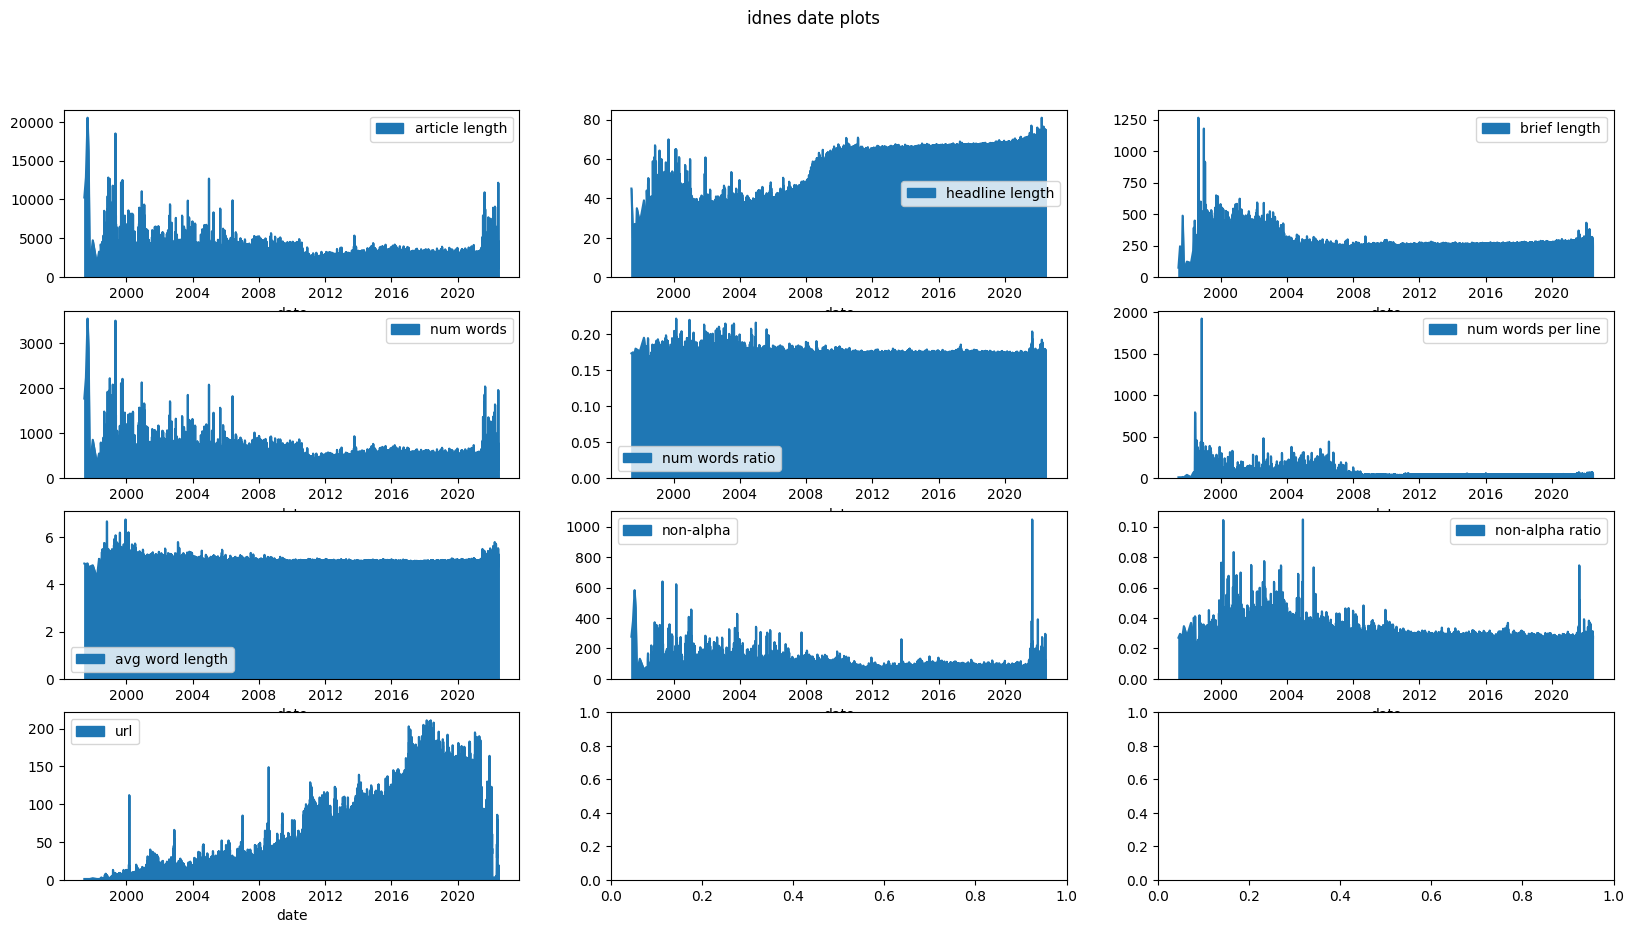

In [20]:
from article_utils import create_exploratory_plots
create_exploratory_plots(df,save=True)

In [21]:

from preprocess_utils import show_outlier_by_percentiles, show_df_lines, show_outliers, pick_indexes
col = "headline length"
# IROZHLAS INSPECTION
mod = lambda x: x["headline"]

df_tmp = show_outlier_by_percentiles(df, col, 0.999, limit=20)
show_df_lines(df_tmp, file, mod)
# Okayage

Škola dnes mladé lidi nezdravě selektuje, upozorňuje německý sociolog Wilhelm Heitmeyer
Na hřišti slavili i se Součkem. Kdybych nedal, trhal bych si vlasy, řekl střelec Provod
Před 100 lety pokračovaly spory v sociální demokracii. Vedly až k založení Rudého práva
Slavia ještě titul nemá, remizovala a Sparta vyhrála. V boji o záchranu zabrala Příbram
Před 400 lety zemřel tvůrce pražského golema, bytosti bez svobodné vůle, omezené a tupé
Zavřel Strahovský tunel, modelku mu pokousal had. Pro fotografa Peteru není nic nemožné
Třikrát si stáhnete nelegální obsah a odpojí vám internet. Blíží se nový bič na piráty?
Adam Michnik: Mou generaci formovaly policejní obušky a naděje zrozené z pražského jara
Jak se sdílí internet, síť a dvě tiskárny přes Bluetooth: Belkin Access Point (recenze)
Na Antarktidě jsem se potápěl do šedesátimetrové hloubky, říká kytarista Lubomír Brabec
Šéfka léčebny dlouhodobě nemocných v Letovicích hodlá snížit počet pacientů na pokojích
Ještě jste se dnes pořádně nezas

In [22]:

df_tmp = show_outliers(df, col, 20, "lower", limit=20, random=False)
show_df_lines(df_tmp, file, mod)

# Shows that we shouldn have split by -

Nová kráska z Česka
Fansite BonusWeb CZ
Velikonoce na Kypru
Duchovní nástupce X
Spor o otcovství AK
Na paktu Ribbentrop
King Charles španěl
Člověče, nezlob se!
Orbital Destruction
HW News: ATI Gemini
(Ne)záludné hotovky
Sony Ericsson P990i
Hypoteční slovníček
Super Breakout 2007
Sony Ericsson W550i
Hradecký půlmaraton
ArcSoft PhotoStudio
Syndrom Kavčích hor
Snalien Catastropic
Program na 23. září


In [23]:
df_tmp = df.sort_values(col, ascending=False)
show_df_lines(df_tmp[0:1], file, mod)

Atentáty v Evropě jsou dílo pražských cyklistů! Američané chtěli v Sýrii vypustit chemtrails a omylem si naložili sarin: Recesisté propašovali do Parlamentních listů články plné nesmyslů. Editoři webu to nepoznali a vydali je


Články v Parlamentních listech si platí ministři i hejtmani. Celkové částky jdou do milionů. Inzerce vypadá jako redakční články
Experti na psychologickou válku působili i v Česku. Whistleblower z Cambridge Analytica to řekl na půdě britského parlamentu
Jan Penkala z Acomware: Vydavatelé internetového obsahu i inzerenti musí změnit způsob placení za reklamu. Vydělají na tom všichni
S Přibilem jsem se dva roky neviděl, říká klíčový muž z Práva, přes kterého měl chtít Přibil protlačit svůj článek
Tisk v Německu také čelí propadům: Obrovskou sílu mají stále lokální deníky. Z celostátních je nejúspěšnější bulvární Bild
David F. Wagner: Televizní Rada vytýká ČT neobjektivitu. Sama je ale zaujatá a její zpráva je plná školáckých chyb
Atentáty v Evropě jsou dílo pražských cyklistů! Američané chtěli v Sýrii vypustit chemtrails a omylem si naložili sarin: Recesisté propašovali do Parlamentních listů články plné nesmyslů. Editoři webu to nepoznali a vydali je
Tvůrci Kefírera: Zajímalo nás, jestl

,article length,headline length,brief length,num words,num words ratio,num words per line,avg word length,non-alpha,non-alpha ratio
count,323464.000000,323464.000000,318615.000000,323464.000000,323464.000000,323464.000000,323464.000000,323464.000000,323464.000000
mean,2736.563509,66.623021,262.041972,472.070802,0.171876,39.870873,4.940654,76.307577,0.027504
std,2103.451119,7.747993,59.769151,369.606133,0.011304,13.348601,0.352592,72.987062,0.006939
min,16.000000,1.000000,22.000000,2.000000,0.083333,2.000000,1.941606,0.000000,0.000000
25%,1396.000000,64.000000,221.000000,238.000000,0.164222,31.666667,4.708930,36.000000,0.023311
50%,2268.000000,68.000000,264.000000,390.000000,0.170732,37.750000,4.953368,62.000000,0.026715
75%,3468.000000,71.000000,301.000000,596.000000,0.178483,45.444444,5.177784,96.000000,0.030715
max,99526.000000,225.000000,825.000000,14326.000000,0.424149,1802.000000,11.500000,6609.000000,0.228747


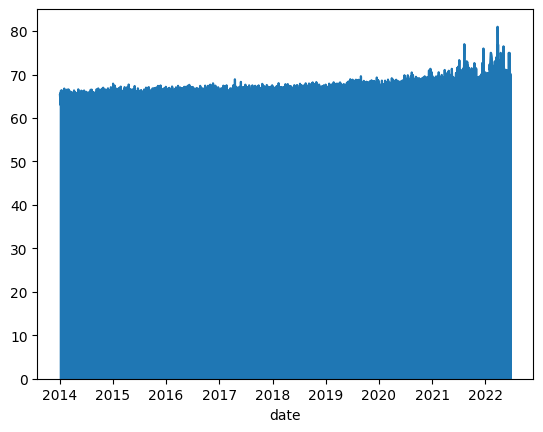

In [24]:

from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] > datetime(2014, 1, 1).date()) & (df_tmp["date"] < datetime(2026, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()


lines = df_tmp.sort_values(col, ascending=False).head(20)
show_df_lines(lines, file, mod)
df_tmp.describe()

array([[<AxesSubplot:title={'center':'article length'}>]], dtype=object)

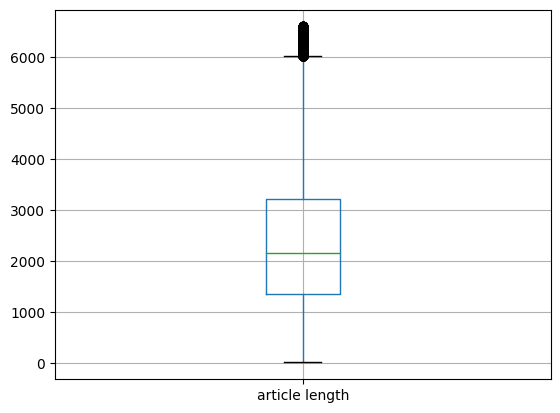

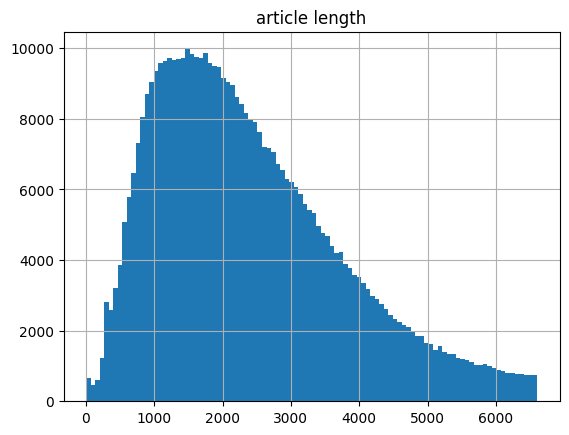

In [25]:

import numpy as np
# ARTICLE LENGTH
#show_df_lines(df_art, file, mod)
col = "article length"
# Long articles -> podcast transcript
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)


In [26]:
df_art = show_outlier_by_percentiles(df,col, 0.9999, limit=5)

content_mod = lambda art : art["url"] + "\n" + art["content"] + "\n---------------\n"
show_df_lines(df_art, file, content_mod)

https://www.idnes.cz/technet/vesmir/prvni-ztracene-zivoty-exkluzivni-serial-o-dobyvani-vesmiru.A071008_181341_tec_vesmir_vse
Historii půlstoletí kosmonautiky sledujeme v seriálu, jehož nové díly přinášíme každý týden. 
1. díl  Co bylo před Sputnikem 2. díl Družice zjistily, že vesmír je radioaktivní3. díl První byl Gagarin4. díl Kosmonautika zmenšila zeměkouli 5. díl Světové počasí hlídáme z kosmu téměř 50 let6.díl Chytré automaty proklestily cestu člověka na Měsíc
SMRT V APOLLU
Nepříjemné proroctví
„Jestliže zemřeme, chceme, aby to lidé akceptovali. Děláme nebezpečnou práci, ale doufám, že ať už se stane cokoliv, program to nezdrží. Dobývání vesmíru stojí za to, riskovat život.“
Když Gus Grissom pronesl tato téměř prorocká slova na tiskové konferenci v březnu 1965 po úspěšném dokončení letu Gemini GT-3, netušil, jak se jeho slova naplní. Nebyl sice první obětí kosmického programu, ale jeho smrt v plamenech v kosmické lodi Apollo společně s Rogerem Chaffeem a Edgarem Whiteem přitáhla p

In [27]:
from preprocess_utils import show_outliers
df_art = show_outliers(df,col, 300, "lower", limit=10, random=False)
show_df_lines(df_art, file, content_mod)

https://www.idnes.cz/hry/kratke-zpravy/autori-spider-mana-vydavaji-vr-strilecku-stormlands.A191113_155441_bw-kratke-zpravy_srp
Studio Insomniac nás loni uchvátilo svým Spider-Manem (naše recenze), jejich následující hra má však mnohem nižší ambice. Podle launch traileru to vypadá na generickou střílečku s roboty, kterou nezachrání ani virtuální realita. Možná to bude i zábava, ale toto talentované studio má rozhodě na víc.
---------------

https://www.idnes.cz/hry/cestiny/software/mirascan.A020603_94589_bw-cestiny-software_bw
Program ke skeneru Acer SZW 3300U.
Kdo ho má bude jistě potěšen.
A teď pár slov k instalaci: cesta je zadána v SFX Makeru, ale doporučuji zkontrolovat ji
a zálohovat 3 uvedené knihovny (instalace do C:\Windows\Twain_32\Mira4_02). Snad s tím nebudete mít potíže. Kdyby ano, napište mi.
Loučí se CeZet
---------------

https://bonusweb.idnes.cz/nove-screenshoty-z-point-of-existence-2-d9o-/Clanek.aspx?c=A051104_mod-poe2051104_bw
Point of Existence: 2 se nám pomalu vykr

In [28]:
import pandas as pd
df_article = df
df_article = df_article[df_article["date"] > datetime(1998, 1, 1).date()]
df_article = df_article.pivot_table(index="date", values="article length", aggfunc="mean")
outlier =show_outlier_by_percentiles(df_article,col, 0.99, limit=5)
max_date = df_article.idxmax().values[0]
max_date  = pd.to_datetime(max_date).date()
x =df[df["date"] == max_date]
x_sorted =x.sort_values(col, ascending=False)
for x in x_sorted[0:1]["url"]:
    print(x)

# Eh it's is truly freaking long
show_df_lines(outlier, file, content_mod)



https://www.idnes.cz/hry/recenze/quest-for-glory-v-dragon-fire.A000405_questforglory5_bw


https://www.idnes.cz/zpravy/zahranicni/usa-chteji-ciny-ne-jednani.A010915_201426_zahranicni_has
"Prezidentovo poselství Talibanu je jasné - je čas pro činy, ne pro vyjednávání," uvedl Fleischer bez dalších podrobností. Americký prezident George Bush zároveň důrazně vyzval talibanský režim, aby vydal i vedení teroristické organizace Al-Kajdá, kterou vede právě bin Ládin. Bush rovněž prohlásil, že válka proti terorismu bude světovou kampaní.
Taliban nabízí jednáníVůdce Talibanu mulla Muhammad Umar oznámil, že je připraven jednat se Spojenými státy o Usámovi bin Ládinovi. "Už jsme několikrát jednali se současnou americkou vládou i s předchozími americkými kabinety a jsme připraveni k dalšímu jednání," řekl podle agentury AIP Umar, který ještě v úterý vyhlašoval USA svatou válku, na zasedání rady muslimských učenců věnovaném osudu bin Ládina a možnosti amerického útoku na Afghánistán.
"Nesnažili jsme se vytvořit problémy s Amerikou," dodal Umar, který již předtím vyloučil jakékoli justiční

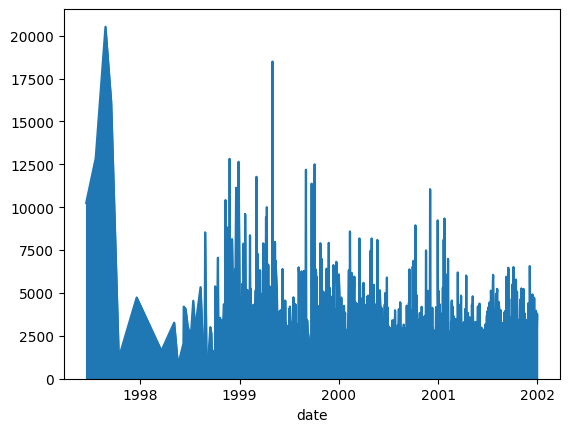

In [29]:
from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] < datetime(2002, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()
out = show_outliers(df_tmp,col, 15000, "higher", limit=2, random=False)
show_df_lines(out, file, content_mod)

In [30]:
# Word length

col = "avg word length"
df_word = show_outlier_by_percentiles(df,col, 0.99, limit=5)
show_df_lines(df_word, file, content_mod)

https://sdeleni.idnes.cz/bydleni/kvalitni-designove-i-bezpecnostni-dvere-muzete-nakoupit-pres-eshop.A150211_135059_rea-sdeleni_ahr
V novém eshopu Dveřeportalevně.cz najdete širokou nabídku prvotřídních dveří té nejvyšší kvality. Vybrat si zde můžete interiérové kousky za příznivé ceny, nebo také speciální bezpečnostní dveře, které chrání váš majetek před nezvanými hosty i šířením požáru.
V nabídce interiérových dveří si můžete vybrat lakované, laminátové a se syntetickou nebo přírodní dýhou. Eleganci a styl dodají každému prostoru například moderní dveře řady Porta LEVEL. S nimi dostane váš domov punc luxusu, ale vaší peněženku nezatíží.
Bezpečnost, funkčnost a kvalita vždy na prvním místě, design jako příjemný bonus
Bytové a vchodové dveře výrobce PORTA splňují nejen vysoké nároky na design, ale i na bezpečnost. Druhou bezpečnostní třídou podle Evropské normy se pyšní vkusné bytové dveře Verte FORES. Typ KWARC je navíc mimořádně odolný vůči nepříznivým podmínkám používání, jaké se vys

In [31]:


df_word = show_outliers(df,col, 4,  "lower", limit=5, random=False)
show_df_lines(df_word, file, content_mod)


https://www.idnes.cz/onadnes/vztahy-sex/vymena-manzelek-po-tehle-vymene-pujdu-do-prdele.A160308_161316_vztahy-sex_jup
Také prodavačka Ingrid (35) je v domku v moravské vísce Spálov hlavou rodiny. Její manžel Jiří (47) je totiž řidič a doma bývá jen o víkendech, a tak starost o pět dětí ve věku 17 až 4 roky leží na ní.
Špína, prošlé potraviny a samostatné děti
Fotogalerie
„Ta si to dovedla zařídit,“ musela ocenit Nina překvapená z toho, jak jsou děti „vycepované“, samostatné a šikovné. Samy si obstarají snídaně i svačiny do školy, samy se hrnou do úklidu a překvapené Nině se vším pomáhají. A že je ve starém baráčku u silnice pořád co uklízet.
Nina (36) ze Zbůchu u Plzně, která se do Výměny těšila a slibovala si od ní dobrodružství, je ze špíny od prvního okamžiku zděšená. „Jestli tu bude pavouk, tak tady spát nebudu. Doufám, že mají vysavač,“ svěřila se s prvními pocity a z nepořádku obvinila Ingrid.
„Přesně to, co jsem nechtěla: abych tu musela chodit týden s hadrem. Je mi líto mého ma

In [32]:
# Word num

col = "num words ratio"
mod = lambda art : art["content"]
df_word = show_outliers(df,col, 0.22, "higher", limit=10, random=False)
show_df_lines(df_word, file, content_mod)

https://www.idnes.cz/oh/ateny/slovensky-strelec-gonci-ziskal-bronz.A040816_155250_oh04_strelba_ot
Kvalifikaci vyhrál pozdější vítěz Ču Čchi-nan výkonem 599 bodů, pouze jednou ze šedesáti pokusů tedy netrefil maximální "desítku". Stanovil tak nový olympijský rekord.
Košický rodák Gönci zahájil závěrečnou fázi o medaile, kde na závodníky čekalo dalších deset střel, slabším pokusem 9,5 bodu. Ve třetí sérii se však na Inda dotáhl a v další se už dostal o jednu desetinu bodu před svého něj. Bindra poté odpadl a skončil až sedmý.
Gönci se musel ještě v závěru vyrovnávat s atakem Korejce Čchon Min-Ho, ale poslední vydařenou ranou 10,4 si nakonec zajistil bronzovou medaili.
Vítězný Ču Čchi-nan dosáhl výsledku 702,7 a o dvě desetiny překonal světový rekord. Jeho krajan Li Ťie za ním zaostal o 1,4 bodu.
Výsledky: Muži - vzduchová puška na 60 ran: 1. Ču Čchi-nan 702,7 (599+101,7), 2.  Li Ťie (oba Čína) 701,3 (598+103,3), 3. Gönci (SR) 697,4 (596+101,4), 4. Cheon Min-ho (Korea) 696,6 (595+101,6), 

In [33]:

df_word = show_outliers(df,col, 0.11, "lower", limit=10)
mod = lambda art : art["content"]
show_df_lines(df_word, file, content_mod)


https://www.idnes.cz/xman/styl/letni-kureci-burger-recept.A150624_115948_xman-styl_fro
Co budete potřebovat:jedno kuřecí prso na dva strávníkyolivový olejcitronmořskou sůlburgerové housky mozzarellumajonézuparmezánlistový salát
Ingredience na pesto:čerstvě mletý pepřčesnekpiniové oříškysůlčerstvá bazalkaparmezánpecorinoolivový olej
---------------

https://www.idnes.cz/revue/spolecnost/dovolena-jako-dobrodruzstvi.A_1999M176V01C
Horolezectví vyžaduje zkušenost
---------------

https://www.idnes.cz/finance/pojisteni/1-7-milionu-motoristu-uz-uzavrelo-povinne-ruceni.A_991207_144049_ruceni_jjx
Stále ale hrozí nebezpečí, že někteří majitelé aut nestačí pojištění do konce roku uzavřít, poněvadž Policie ČR evidovala na konci roku 1998 přes 5,3 miliónu vozidel.
Nový zákon o povinném ručení je účinný od 30. června. Zrušil monopol České pojišťovny na poskytování produktu a motoristům ukládá, aby ještě letos uzavřeli novou smlouvu s některou z již 12 oprávněných pojišťoven, jinak se vystaví nebezp

In [34]:
# BRIEF INSPECTION
col = "brief length"
df_tmp = show_outlier_by_percentiles(df,col, 0.999, limit=10)
mod_brief = lambda x: x["url"] + ":\n" + x["brief"] + "\n---------------\n "
show_df_lines(df_tmp, file, mod_brief)

In [35]:

df_tmp = show_outliers(df,col, 20, "lower", limit=20, random=False)
show_df_lines(df_tmp, file, mod_brief)


https://www.idnes.cz/hry/cestiny/software/windowblind-1-01.A000405_73075_bw-cestiny-software_bw:
čeština do programu
---------------
 
https://www.idnes.cz/hry/cestiny/software/netmedic.A000328_58317_bw-cestiny-software_bw:
čeština do programu
---------------
 
https://www.idnes.cz/hry/novinky/zpravy-ze-sveta-nds.A060210_ndstrepyz060211_bw:
Zprávy ze světa NDS
---------------
 
https://www.idnes.cz/hry/cestiny/software/warez-cd-menu-2.A000405_73019_bw-cestiny-software_bw:
čeština do programu
---------------
 
https://www.idnes.cz/hry/cestiny/software/modplug-player.A000328_58299_bw-cestiny-software_bw:
čeština do programu
---------------
 
https://www.idnes.cz/hry/cestiny/software/get-right-3-2.A000318_40597_bw-cestiny-software_bw:
čeština do programu
---------------
 
https://www.idnes.cz/hry/cestiny/software/hypersnapdx.A000325_53342_bw-cestiny-software_bw:
čeština do programu
---------------
 
https://www.idnes.cz/hry/cestiny/software/multimachine-emulator.A000328_58262_bw-cestiny-s

https://www.idnes.cz/revue/spolecnost/milovnik-cisteho-humoru-s-vtipem.A_990616_161739_rozhovory_pez:
"Čo bolo, to bolo, terazky som majorom." Souvětí, které znají a užívají i lidé, kteří nevědí, koho citují. Jeho autor, otec Černých baronů, žije - dnes už sám - v bílém domku u staré chodovské sokolovny. Sám se sbírkou zvonečků a zvonků, mezi nimiž se najde i zvonkohra nebo malá zvonička ze sedlcké kostnice. Branku v železném plotě nezamyká. Tráva na zahrádce narostla vysoko. Do Chodova - vesnice tehdy od Prahy poměrně vzdálené - se humorista Miloslav Švandrlík přistěhoval v roce 1936 jako čtyřletý, a to stejným řízením, jakým se Adolf Branald ocitl na nedalekém Spořilově. Jeho otec tu koupil malou, hypotékou zatíženou nemovitost se zvláštní slevou pro tramvajáky a zaměstnance plynáren a dlouhá léta ji splácel. "Jako spoustě zadlužených rodin, i nám pomohla protektorátní inflace," vzpomíná Miloslav Švandrlík. Dnes leží Chodov v severní části pražského Jižního Města. Starousedlíka Švand

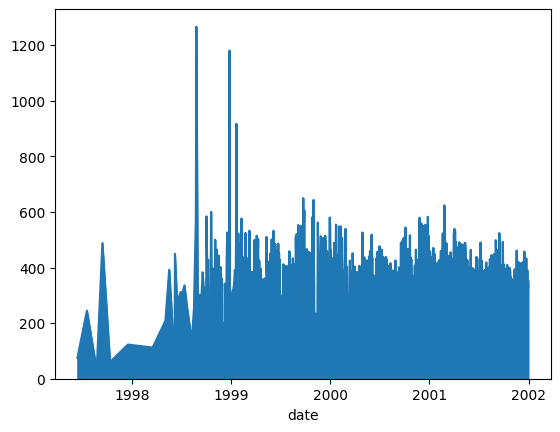

In [36]:
from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] < datetime(2002, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()
out = show_outliers(df_tmp,col, 1000, "higher", limit=2, random=False)
show_df_lines(out, file, mod_brief)
show_df_lines(out, file, content_mod)


In [37]:
col = "non-alpha ratio"
df_tmp = show_outliers(df,col, 0.06, "higher", limit=10)
show_df_lines(df_tmp, file, content_mod)
import numpy as np

https://www.idnes.cz/hokej/extraliga/hokejova-slavia-dala-doma-konecne-gol-od-kladna-ale-schytala-debakl.A091022_134642_hokej_lge
Slávistům chyběli dva útočníci. Daniel Branda nenastoupil kvůli zranění a Tomáš Kůrka stále nemůže hrát, protože jeho přestup z Českých Budějovic není dotažen.
Do utkání však nevstoupili dobře. Nevyužili přesilovku a naopak sami inkasovali. V 6. minutě se prosadil Kuchler. Pak v početní výhodě skóroval Patera a čtyři minuty před koncem první třetiny zvýšil na 3:0 pro hosty Kalla.
Nerudovi se úvodní část vůbec nepovedla. Připsal si jen tři přesné zásahy. A byl první, kdo kapituloval ve druhé třetině. Kladno opět rychle využilo početní výhodu. Jelínkovo vyloučení potrestal již po dvanácti vteřinách Frolík.
Středočeši byli při chuti, což dokumentoval Kaberle, jenž trefil tyč. Z protiútoku se ale prosadili domácí. Vondrkovu přihrávku zužitkoval Havel a po 168 minutách prolomil střelecký půst Slavie v O2 Areně.
Utkání jsme sledovali v On-line reportáži
Kladno vša

In [38]:
df_tmp = show_outliers(df,col, 0.012, "lower", limit=10)
show_df_lines(df_tmp, file, mod)

Jako stavební materiál pro hnízda slouží vránám v Tokiu izolace optických kabelů, kterými proudí internetová data.
Podle agentury DPA způsobili tito inteligentní ptáci jen v japonském hlavním městě zhruba 700 výpadků spojení. Oproti telefonním vedením je izolační materiál optických kabelů tenčí a vrány jej tak jednodušeji získávají.
Na zábavní park Tatzmania v obci Löffingen v jihozápadním cípu Německa se snesla vlna kritiky poté, co jeden z uživatelů sociální sítě reddit zveřejnil video zachycující novou atrakci s názvem Orlí let.
Ramena kolotoče natřeného hnědou barvou totiž při pohybu připomínají dvě obří svastiky. Tento symbol byl od roku 1920 oficiálním znakem nacistické strany a v současnosti je jeho používání v Německu zakázané.
Podle mluvčího zábavního parku si do okamžiku, kdy se o atrakci začalo diskutovat na sociálních sítích, podobnosti ramen kolotoče s nacistickými symboly nikdo nevšimnul. Provozovatel parku Rüdiger Braun se nyní rozhodl vyřadit atrakci z provozu a začít j

https://www.idnes.cz/oh/ateny/cyklista-kankovsky-byl-na-kilometr-desaty.A040820_174320_oh04_kolo_rav
Hoy vytvořil olympijský rekord časem 1:00,711 minuty. Na rychlé aténské dráze překonali dosavadní maximum jeho krajana Jasona Quallyho ze Sydney ještě další tři závodníci, ale jen Shanu Kellymu z Austrálie to nestačilo na medaili.
Stříbro získal Francouz Arnaud Tournant, třetí skončil Stefan Nimke z Německa, před čtyřmi lety stříbrný.
Kaňkovský, který se do Atén dostal až po udělení divoké karty po zahájení her, vyrazil vstříc čtyřem okruhům jako sedmý a čas 1:03,038 jej zařadil za Kubánce Lopeze Naranja. Vinou pomalejšího začátku český jezdec zaostal za svým letošním českým rekordem o šest desetin sekundy.
Skvělou podívanou nabídlo divákům posledních pět závodníků. Dvaatřicetiletý Kelly, který vybojoval stříbro již v Barceloně v roce 1992 a v Sydney měl bronz, jako první překonal olympijský rekord, ale nakonec zůstal bez medaile.
Tournant sice nenašel šestkrát na této trati přemožitele

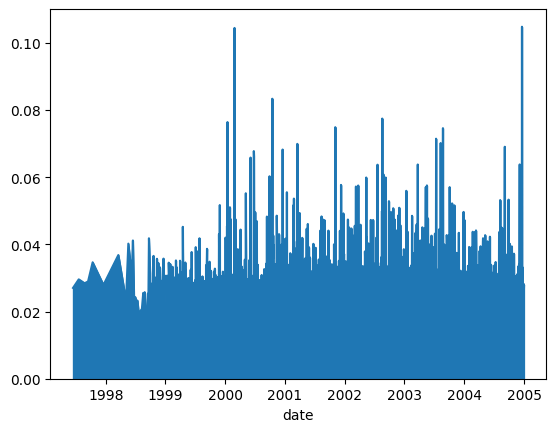

In [39]:
from datetime import datetime
df_tmp = df
df_tmp = df_tmp[(df_tmp["date"] < datetime(2005, 1, 1).date())]
df_tmp.groupby("date")[col].mean().plot.area()
out = show_outliers(df_tmp,col, 0.08, "higher", limit=5, random=False)
show_df_lines(out, file, content_mod)



In [40]:
# num words per line
col = "num words per line"
df_tmp = show_outliers(df,col, 40, "higher", limit=10)
mod = lambda art : art["content"] + "\n---------------\n"
show_df_lines(df_tmp, file, mod)

Ten názor českým éterem rezonuje už řadu měsíců a zní zhruba takto: Informací o islámu máme dostatek, je to násilnická ideologie. „Dneska už víme dost, ten radikální náboj je uložený ve víře,“ tvrdil například nedávno v ČT psycholog Jiří Brančík.
Mnozí Češi takové přesvědčení sdílejí, dosud ale šlo jen spekulovat, kolik jich je. Agentura Median proto konkrétní otázku zařadila do jednoho ze svých výzkumů. Závěr zní takto: Češi si v průměru myslí, že za „občas obhajitelné v rámci obrany islámu“ považuje útoky na civilisty 43,4 % muslimů, což je téměř trojnásobek oproti číslu, získanému výzkumem v muslimských zemích.
Fotogalerie
Takzvaný medián činí 40 %. Polovina dotázaných Čechů tedy odhadla podíl násilí akceptujících muslimů do 40 %, polovina uvedla hodnotu vyšší.
Data Medianu ukazují, že čím více dotázaní nadhodnotí odhad podílu muslimů připouštějících násilí na civilistech, tím více jsou v rámci boje proti terorismu naklonění radikálním řešením, jako je zákaz islámu v Evropě.
Zatímco

array([[<AxesSubplot:title={'center':'num words per line'}>]],
      dtype=object)

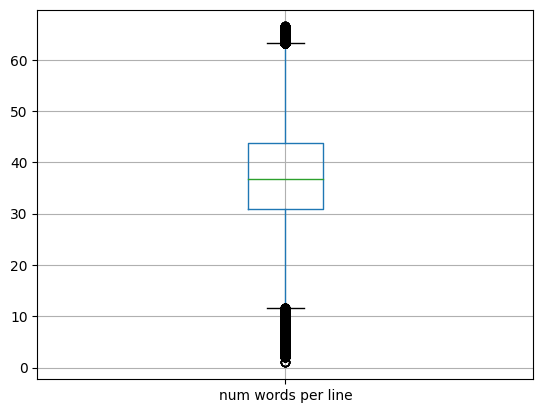

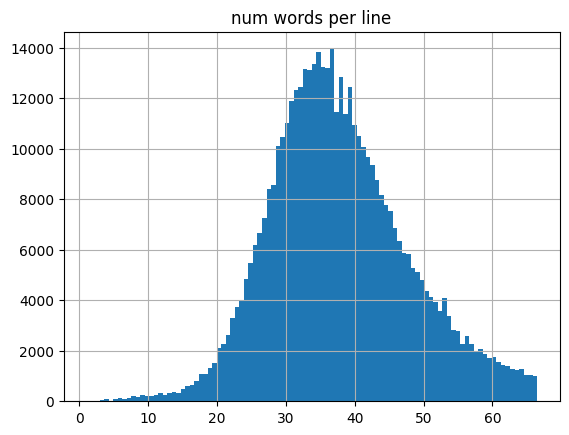

In [45]:

col = "num words per line"
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)

In [48]:

# num words per line
df_tmp = show_outlier_by_percentiles(df,col, 0.999, limit=2)
repr_content_mod = lambda art : art["url"] + "\n" + repr(art["content"]) + "\n---------------\n"
show_df_lines(df_tmp, file, repr_content_mod)

https://www.idnes.cz/hry/plne-hry/highway-pursuit-8211-nejlepsi-zavodni-3d-akce.A040407_075520_bw-plneHry-akcni_bw
'Highway (dálnice), pursuit (stíhání). Tato dvě slova plně vystihují děj nebo spíše koncept hry. Jediné, co potřebujete k úspěchu (jako u většiny akcí), je zůstat naživu. To ovšem není nijak snadné, protože se musíte ubránit před desítkami nepřátel, jež vás dokáží bez problému smést z mostu do řeky nebo klidně mimo trať, což bohužel také (i když pojedete pouze po trávě) za pár sekund způsobí smrt. Většinu vozů (až na obrněné pojízdné stroje), dokážete eliminovat kulometem, ovšem když se vše dobře naplánuje, můžete jim zatopit i legračněji. Stačí nepřítele předjet a vypustit mu pod kola olej či plyn (přes který není vidět). Tím automobil vyřadíte z tratě, tudíž se vám hned přičtou body v rozmezí od 500 – 1500. Jediný háček je v tom, kde takovéto zbraně sehnat? „Svůdný“ ženský hlas vám vždy před nákladním vozem (v němž se skýtají zbraně) oznámí, abyste jej neminuli (stojí na

In [51]:

df_tmp = show_outliers(df,col, 10, "lower", limit=2)
show_df_lines(df_tmp, file, repr_content_mod)

https://www.idnes.cz/onadnes/zdravi/pri-behani-hraje-nejvetsi-roli-hlava-osobni-zkusenosti.A160314_103053_ctenari-sobe_jid
'Jsem běžec. Tedy, nejsem běžec v tom slova smyslu,\njak by si to mohli představovat mnozí z vás, ale běhám. Ne, že\nbych běhal hodně. Čas od času vyběhnu a polknu nějaké\nkilometry. Běhání neberu jako životní styl, boty mám dvoje a\nrozhodně nepatří k nejdražším, oblečení natolik kvalitní,\naby se moje sportovní aktivita neproměnila v torturu vodou, teplem,\nzimou nebo vlkem, ale rozhodně ne výhradně z dílen vyhlášených\nznaček.\nHodinky s GPS vlastním a beru je pravidelně na zrychlené\ncesty po okolí, ale činím tak spíš z důvodů společenských a\nvzpomínkových. Abych si po návratu jednoduše mohl přehrát v\npohodlí domova svoji cestu ještě jednou a nad křivkami a čísly\nsi oživit, kde mi bylo do ejchuchu a kde pro změnu do ouvej.\nNutno\ndodat, že ouvejů bývá mnohem více. Předpokládám, že ti v\nběhání zběhlejší by mi asi snadno vysvětlili, jako moc za\njejich množs

KeyboardInterrupt: 